## Hometask 

1) Classify the signs (fingers)  dataset 

2) Try to change the number of hidden layer 

3) Change the activation to tanh or sigmoid and see what happens

4) Change the dropout ratio and check the performance

In [1]:
!wget https://www.dropbox.com/s/f33ym46utiwdvy4/train_signs.h5?dl=0 -O data/train_signs.h5
!wget https://www.dropbox.com/s/1doojr76evzroet/test_signs.h5?dl=0 -O data/test_signs.h5

--2024-02-21 21:32:02--  https://www.dropbox.com/s/f33ym46utiwdvy4/train_signs.h5?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.72.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.72.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/f33ym46utiwdvy4/train_signs.h5 [following]
--2024-02-21 21:32:02--  https://www.dropbox.com/s/raw/f33ym46utiwdvy4/train_signs.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc6e148af371d04462bb4a561da.dl.dropboxusercontent.com/cd/0/inline/CNs9YOzSFtXWsVzsaI14LXnrVQ7--3YtxQAEK4S9Nqj4OKXEDK0ljAxW0xWv9UgwfiYHCjhpXxJn4N8lht1tVgYdDSG0pA-4bsmPIxGOBHS9DtDlxdnZJrxZWC4At0jd9JrpwLQBcHrJmmjZblE2qA8v/file# [following]
--2024-02-21 21:32:03--  https://ucc6e148af371d04462bb4a561da.dl.dropboxusercontent.com/cd/0/inline/CNs9YOzSFtXWsVzsaI14LXnrVQ7--3YtxQAEK4S9Nqj4OKXEDK0ljAxW0xWv9UgwfiYHCjhpXxJn4N8lht1tVgYd

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def load_dataset():
    fn =   'data/train_signs.h5'
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn ='data/test_signs.h5'
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    Y_test = Y_test.reshape((1, Y_test.shape[0]))
    
    return X_train, Y_train, X_test, Y_test, classes

train_data, train_labels, test_data, test_labels, classes = load_dataset()

print ('train_data.shape=', train_data.shape)
print ('train_labels.shape=',  train_labels.shape)
print ('test_data.shape=', test_data.shape)
print ('test_labels.shape=', test_labels.shape)

train_data.shape= (1080, 64, 64, 3)
train_labels.shape= (1, 1080)
test_data.shape= (120, 64, 64, 3)
test_labels.shape= (1, 120)


In [2]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None:
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows):
        for j in range (n_cols):
            index = n_cols*i+j
            ax = plt.subplot(n_rows,n_cols,index+1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

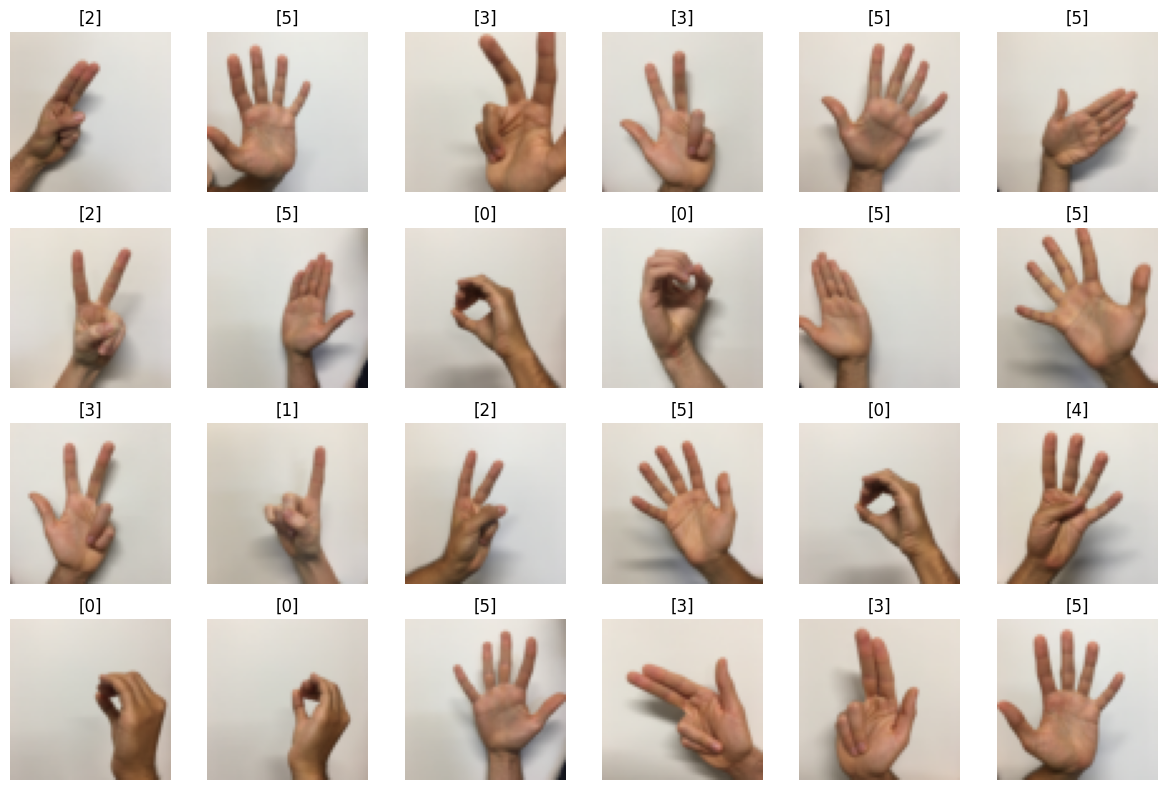

In [3]:
plt.figure(figsize= (12,8))
display_samples_in_grid(train_data, n_rows=4, n_cols=6, y= train_labels.T)
plt.tight_layout(h_pad=1, w_pad=1)

# Solution

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-02-21 22:21:13.825342: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-21 22:21:13.858224: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 22:21:13.858252: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 22:21:13.859227: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-21 22:21:13.864827: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-21 22:21:13.865729: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [5]:
def load_dataset():
    train_dataset = h5py.File('data/train_signs.h5', "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # train set labels

    test_dataset = h5py.File('data/test_signs.h5', "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    return X_train, Y_train, X_test, Y_test, classes

X_train, y_train, X_test, y_test, classes = load_dataset()

Normalize pixel values to between 0 and 1

In [6]:
X_train, X_test = X_train / 255.0, X_test / 255.0

Convert labels to one-hot encoding

In [7]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=6)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=6)

Define model

In [15]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='tanh'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

Compile model

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Data augmentation

In [17]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)

Fit the model

In [18]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=32), epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
34/34 [==============================] - 3s 68ms/step - loss: 1.7844 - accuracy: 0.2417 - val_loss: 1.5217 - val_accuracy: 0.3583
Epoch 2/50
34/34 [==============================] - 2s 61ms/step - loss: 1.4774 - accuracy: 0.4167 - val_loss: 1.1408 - val_accuracy: 0.6333
Epoch 3/50
34/34 [==============================] - 2s 61ms/step - loss: 1.3274 - accuracy: 0.4917 - val_loss: 1.0429 - val_accuracy: 0.5583
Epoch 4/50
34/34 [==============================] - 2s 61ms/step - loss: 1.1985 - accuracy: 0.5250 - val_loss: 0.7571 - val_accuracy: 0.7250
Epoch 5/50
34/34 [==============================] - 2s 65ms/step - loss: 1.0315 - accuracy: 0.5981 - val_loss: 0.7072 - val_accuracy: 0.7083
Epoch 6/50
34/34 [==============================] - 2s 65ms/step - loss: 0.9142 - accuracy: 0.6454 - val_loss: 0.5553 - val_accuracy: 0.7750
Epoch 7/50
34/34 [==============================] - 2s 64ms/step - loss: 0.8277 - accuracy: 0.6806 - val_loss: 0.4377 - val_accuracy: 0.8583
Epoch 8/50
34

Evaluate model

In [19]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

4/4 [==============================] - 0s 15ms/step - loss: 0.1059 - accuracy: 0.9667
Test accuracy: 0.9666666388511658


Plot training history

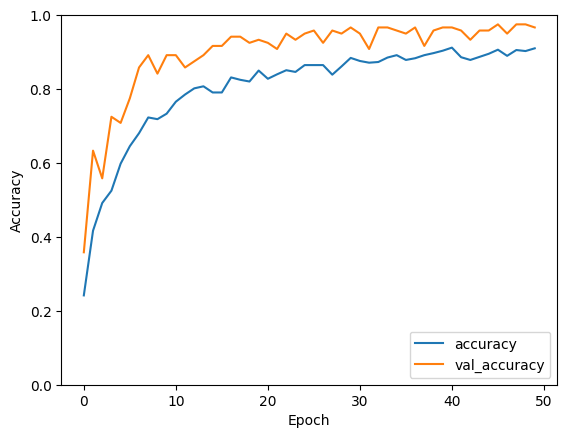

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### Plot 10 predictions

1/1 [==============================] - 0s 21ms/step


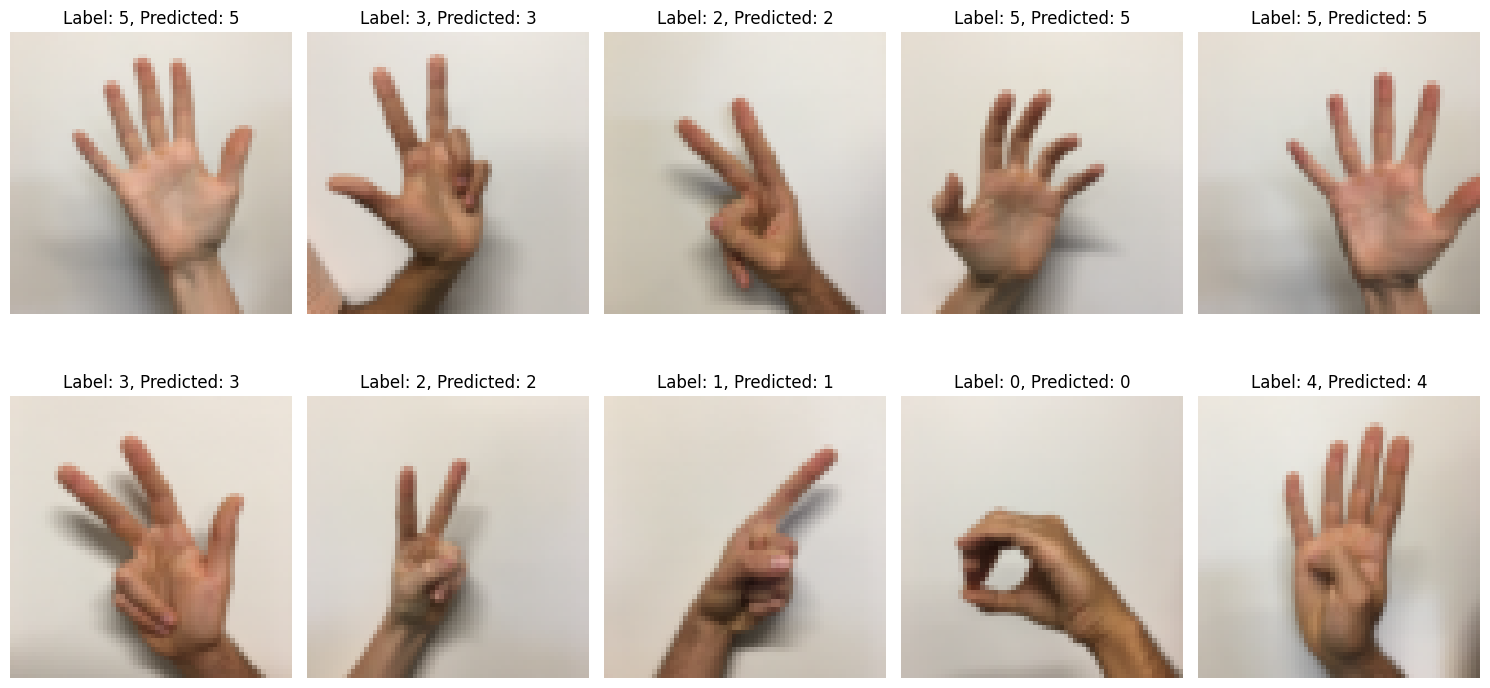

In [23]:
num_predictions = 10
random_indices = np.random.choice(len(X_test), num_predictions)
random_images = X_test[random_indices]
random_labels = y_test[random_indices]
predictions = model.predict(random_images)

plt.figure(figsize=(15, 8))
for i in range(num_predictions):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i])
    plt.title(f"Label: {random_labels[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Source 
[Image Classification using Feedforward Neural Network in Keras](https://www.learnopencv.com/image-classification-using-feedforward-neural-network-in-keras/)

